In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
import wfdb
import copy as cp
import scipy.signal as signal
import scipy.stats as stats
from sklearn import preprocessing
from tqdm import tqdm
import os
import pathlib
import re
import pandas as pd
import pickle
import csv
import statistics

In [2]:
import timeit

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

from sklearn.preprocessing import PolynomialFeatures

import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import lightgbm
import lightgbm as lgb
from sklearn.preprocessing import LabelBinarizer

import catboost as cb
from catboost import CatBoostClassifier

C:\Users\lms-puvvalat\.conda\envs\afib\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
parent_path = str(pathlib.Path(os.path.normpath('C:\\Users\\lms-puvvalat\\Documents\\GitHub\\2022-svsm-afib-group1\\')))

rlist = []
records = os.path.normpath(parent_path + '/mit-bih-dataframes/subject_list.csv')
with open(records) as rfile:
    recordreader = csv.reader(rfile, delimiter=' ', quotechar='|')
    for row in recordreader:
        rlist.append(row[0])

In [4]:
performance_dict = {
    "Model name": [],
    "Avg Accuracy": [],
    "Std Accuracy": [],
    "Sensitivity": [],
    "Specificity": [],
    "Precision": [],
    "F1 score": [],
    "Run time": [],
    "TPS": []
}

moving_accuracy = {}

In [5]:
feature_dfs = {}
for record in tqdm(rlist):
    feature_dfs[record] = pd.read_csv(os.path.normpath(parent_path + '/mit-bih-time-features/'+record+'.csv'), index_col=0, dtype={'subjectID': str})

combined_features = pd.concat([feature_dfs[key][1:] for key in feature_dfs])

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 36.34it/s]


In [6]:
X = combined_features[['StoS', 'StoR', 'StoL', 'RtoS', 'RtoR', 'RtoL', 'LtoS', 'LtoR', 'LtoL', 'rmssd', 'iqr', 'mad', 'cov']]
y = combined_features['mappedLabel'].map({"Non-Afib": 0, "Afib": 1})
groups = combined_features['subjectID'].astype('int64')

logo = LeaveOneGroupOut()
splits = list(logo.split(X, y, groups=groups))

random search started


C:\Users\lms-puvvalat\.conda\envs\afib\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\lms-puvvalat\.conda\envs\afib\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\lms-puvvalat\.conda\envs\afib\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\lms-puvvalat\.conda\envs\afib\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index i

random search completed


  0%|                                                                                           | 0/23 [00:00<?, ?it/s]C:\Users\lms-puvvalat\.conda\envs\afib\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
  9%|███████▏                                                                           | 2/23 [00:00<00:01, 11.10it/s]C:\Users\lms-puvvalat\.conda\envs\afib\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\lms-puvvalat\.conda\envs\afib\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future v

---Run time is 0.2720577000436606 seconds ---
---Run time per subset is 1.450533438067684e-06 seconds ---

Accuracy of each fold: 
 [0.9680109364319891, 0.9938840889234055, 0.9990950226244344, 0.9936833239752948, 0.9997487752794875, 0.997080291970803, 0.9936112979152656, 0.9996726141758062, 0.987823990355636, 0.9916765755053508, 0.9888779849525678, 1.0, 0.9930283224400871, 1.0, 0.9995012468827931, 1.0, 0.9991723224631683, 0.9995836224843858, 0.9811397282498479, 0.9980179704016914, 1.0, 0.9989429175475687, 0.9996971532404604]
Avg accuracy: 0.9948803559052193
Std of accuracy : 
0.007517746482492523
confusion matrix: 
[[101913    972]
 [    21  84651]]
classification report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    102885
           1       0.99      1.00      0.99     84672

    accuracy                           0.99    187557
   macro avg       0.99      1.00      0.99    187557
weighted avg       0.99      0.99      0.99   

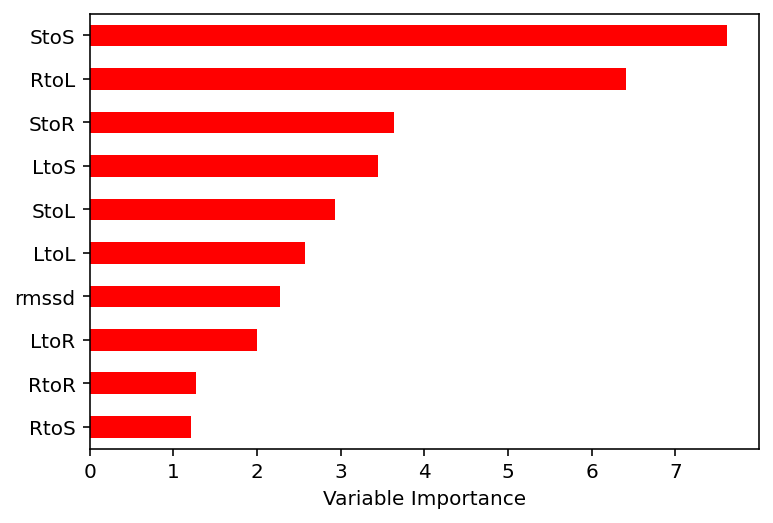

In [7]:
# XGBoost
moving_accuracy['xgboost'] = []
params = {
    "max_depth": list(range(1, 16)),
    "n_estimators": np.linspace(100, 500, 9).astype(int)
}

print("random search started")
randomsearch = RandomizedSearchCV(XGBClassifier(learning_rate = 0.1, use_label_encoder=False, verbose=None, eval_metric='logloss'), param_distributions=params, cv=splits)
randomsearch.fit(X, y)
print("random search completed")

acc_score = []
Truth = []
Output = []

total_time = 0
total_tests = 0

for train, test in tqdm(splits):
    X_test = X.iloc[test]
    y_test = y.iloc[test]
    
    start_time = timeit.default_timer()
    pred_values = randomsearch.best_estimator_.predict(X_test)
    elapsed = timeit.default_timer() - start_time

    subject_acc = []
    total_correct = 0
    total_seen = 0
    for idx, pred in enumerate(pred_values):
        total_seen+=1
        if pred==y_test.iloc[idx]:
            total_correct+=1
        subject_acc.append(total_correct/total_seen)
    moving_accuracy['xgboost'].append(subject_acc)

    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)

    Truth.extend(y_test.values.reshape(y_test.shape[0])) 
    Output.extend(pred_values)
    total_time+=elapsed
    total_tests+=len(X_test)

tps = total_time/total_tests

#print(model.feature_importances_)
Importance = pd.DataFrame({'Importance':(randomsearch.best_estimator_.feature_importances_*100)[0:10]}, 
                      index = (X.columns)[0:10])
Importance.sort_values(by = 'Importance', 
                   axis = 0, 
                   ascending = True).plot(kind = 'barh', 
                                          color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
#plt.savefig('plot1.png')

print("---Run time is %s seconds ---" % total_time)
print("---Run time per subset is %s seconds ---" % tps)
print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print("confusion matrix: ")

cm = confusion_matrix(Truth, Output)
print(cm)
print("classification report: ")
print(classification_report(Truth, Output))

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(randomsearch.best_params_)
print(sensitivity)
print(specificity)
print(precision)
print(f1_score)

results = pd.DataFrame(randomsearch.cv_results_).iloc[randomsearch.best_index_]
print(results)
scores = []
for x in range(len(rlist)):
    scores.append(results['split'+str(x)+'_test_score'])
    
print(scores)
print(np.mean(scores))

performance_dict['Model name'].append("XGBoost")
performance_dict['Avg Accuracy'].append(np.mean(acc_score))
performance_dict['Std Accuracy'].append(np.std(acc_score))
performance_dict['Sensitivity'].append(sensitivity)
performance_dict['Specificity'].append(specificity)
performance_dict['Precision'].append(precision)
performance_dict['F1 score'].append(f1_score)
performance_dict['Run time'].append(total_time)
performance_dict['TPS'].append(tps)

random search started
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002723 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002957 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.00

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:02<00:00, 10.49it/s]


---Run time is 0.38692360000277404 seconds ---
---Run time per subset is 2.0629653918690002e-06 seconds ---

Accuracy of each fold: 
 [0.9342447026657553, 0.969614600524221, 0.9971342383107089, 0.9708029197080292, 0.9983670393166688, 0.9864720194647202, 0.9774714189643577, 0.9960713701096743, 0.9701024713682942, 0.9616858237547893, 0.977974048631556, 0.9986175911525834, 0.9620915032679739, 0.9987741342323015, 0.9826433915211971, 0.9964788732394366, 0.9945373282569111, 0.9966689798750867, 0.9255729061042385, 0.9933932346723044, 0.9982637115718517, 0.9963757173059499, 0.9980819705229154]
Avg accuracy: 0.9818017388931096
Std of accuracy : 
0.020263695770105027
confusion matrix: 
[[100053   2832]
 [   778  83894]]
classification report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    102885
           1       0.97      0.99      0.98     84672

    accuracy                           0.98    187557
   macro avg       0.98      0.98     

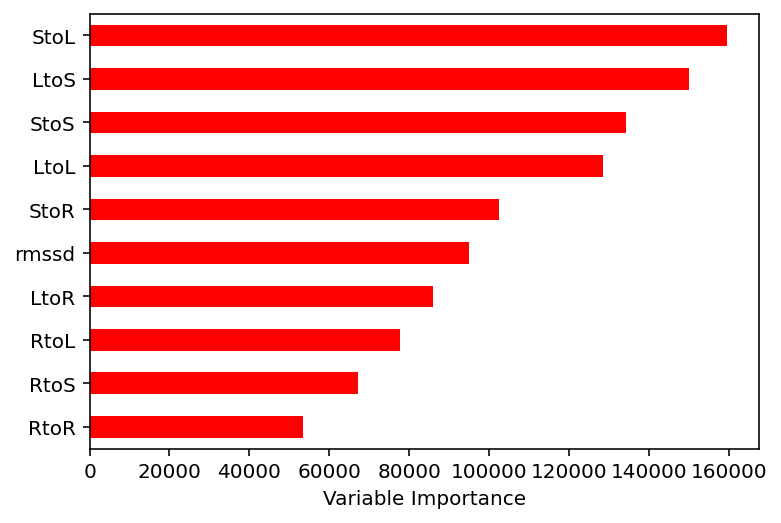

In [8]:
# LightGBM
moving_accuracy['lightgbm'] = []
params = {
    "max_depth": list(range(1, 16)),
    "n_estimators": np.linspace(100, 500, 9).astype(int)
}

print("random search started")
randomsearch = RandomizedSearchCV(lightgbm.LGBMClassifier(learning_rate=0.09,verbose=0,random_state=2), param_distributions=params, cv=splits)
randomsearch.fit(X, y)
print("random search completed")

acc_score = []
Truth = []
Output = []

total_time = 0
total_tests = 0

for train, test in tqdm(splits):
    X_test = X.iloc[test]
    y_test = y.iloc[test]
    
    start_time = timeit.default_timer()
    pred_values = randomsearch.best_estimator_.predict(X_test)
    elapsed = timeit.default_timer() - start_time

    subject_acc = []
    total_correct = 0
    total_seen = 0
    for idx, pred in enumerate(pred_values):
        total_seen+=1
        if pred==y_test.iloc[idx]:
            total_correct+=1
        subject_acc.append(total_correct/total_seen)
    moving_accuracy['lightgbm'].append(subject_acc)

    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)

    Truth.extend(y_test.values.reshape(y_test.shape[0])) 
    Output.extend(pred_values)
    total_time+=elapsed
    total_tests+=len(X_test)

tps = total_time/total_tests

#print(model.feature_importances_)
Importance = pd.DataFrame({'Importance':(randomsearch.best_estimator_.feature_importances_*100)[0:10]}, 
                      index = (X.columns)[0:10])
Importance.sort_values(by = 'Importance', 
                   axis = 0, 
                   ascending = True).plot(kind = 'barh', 
                                          color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
#plt.savefig('plot1.png')

print("---Run time is %s seconds ---" % total_time)
print("---Run time per subset is %s seconds ---" % tps)
print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print("confusion matrix: ")

cm = confusion_matrix(Truth, Output)
print(cm)
print("classification report: ")
print(classification_report(Truth, Output))

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(randomsearch.best_params_)
print(sensitivity)
print(specificity)
print(precision)
print(f1_score)

results = pd.DataFrame(randomsearch.cv_results_).iloc[randomsearch.best_index_]
print(results)
scores = []
for x in range(len(rlist)):
    scores.append(results['split'+str(x)+'_test_score'])
    
print(scores)
print(np.mean(scores))

performance_dict['Model name'].append("LightGBM")
performance_dict['Avg Accuracy'].append(np.mean(acc_score))
performance_dict['Std Accuracy'].append(np.std(acc_score))
performance_dict['Sensitivity'].append(sensitivity)
performance_dict['Specificity'].append(specificity)
performance_dict['Precision'].append(precision)
performance_dict['F1 score'].append(f1_score)
performance_dict['Run time'].append(total_time)
performance_dict['TPS'].append(tps)

random search started
0:	learn: 0.5592564	total: 19.1ms	remaining: 8.57s
1:	learn: 0.4663197	total: 27.5ms	remaining: 6.16s
2:	learn: 0.3975545	total: 36.1ms	remaining: 5.39s
3:	learn: 0.3493841	total: 44.6ms	remaining: 4.97s
4:	learn: 0.3114385	total: 52.3ms	remaining: 4.66s
5:	learn: 0.2853790	total: 60.4ms	remaining: 4.47s
6:	learn: 0.2642751	total: 67.4ms	remaining: 4.27s
7:	learn: 0.2487166	total: 74.4ms	remaining: 4.11s
8:	learn: 0.2359859	total: 81.4ms	remaining: 3.99s
9:	learn: 0.2257150	total: 88.7ms	remaining: 3.9s
10:	learn: 0.2169477	total: 95.8ms	remaining: 3.82s
11:	learn: 0.2101548	total: 102ms	remaining: 3.74s
12:	learn: 0.2058775	total: 110ms	remaining: 3.69s
13:	learn: 0.2001040	total: 117ms	remaining: 3.63s
14:	learn: 0.1960695	total: 124ms	remaining: 3.6s
15:	learn: 0.1924532	total: 131ms	remaining: 3.55s
16:	learn: 0.1888008	total: 138ms	remaining: 3.51s
17:	learn: 0.1858699	total: 145ms	remaining: 3.48s
18:	learn: 0.1827087	total: 152ms	remaining: 3.44s
19:	learn:

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:01<00:00, 17.96it/s]


---Run time is 0.09139330001198687 seconds ---
---Run time per subset is 4.872827994262377e-07 seconds ---

Accuracy of each fold: 
 [0.9265892002734109, 0.9471895932433745, 0.9939668174962293, 0.9594329028635598, 0.9976133651551312, 0.9818978102189782, 0.9548307554360009, 0.9941070551645114, 0.965159734779988, 0.9532302814110186, 0.9751390251880929, 0.9937791601866252, 0.9368191721132898, 0.9986209010113393, 0.9665835411471322, 0.9933845497225778, 0.9927164376758815, 0.9940319222761971, 0.9113770026363821, 0.9900898520084567, 0.9975487692779083, 0.9954696466324373, 0.9979810216030689]
Avg accuracy: 0.9746764572835475
Std of accuracy : 
0.025369228597552824
confusion matrix: 
[[99312  3573]
 [ 1484 83188]]
classification report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    102885
           1       0.96      0.98      0.97     84672

    accuracy                           0.97    187557
   macro avg       0.97      0.97      0.9

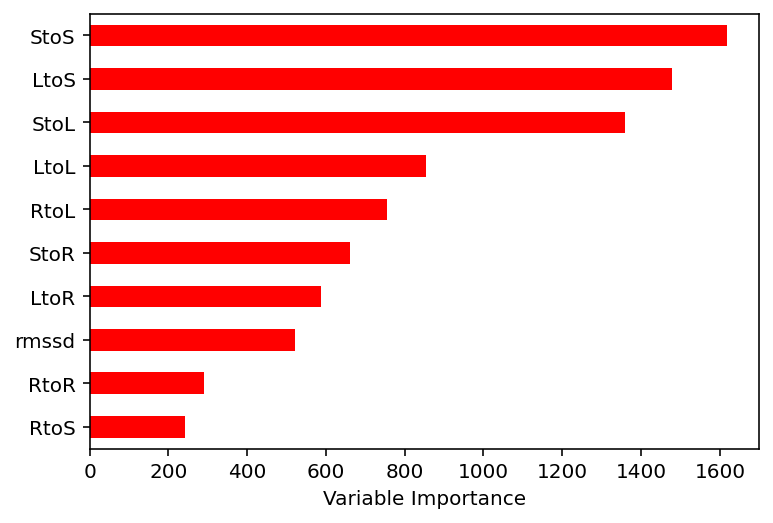

In [11]:
# CatBoost
moving_accuracy['catboost'] = []
params = {
    "max_depth": list(range(1, 16)),
    "iterations": np.linspace(100, 500, 9).astype(int)
}

print("random search started")
randomsearch = RandomizedSearchCV(CatBoostClassifier(learning_rate=0.1, loss_function='Logloss', verbose=None), param_distributions=params, cv=splits)
randomsearch.fit(X, y)
print("random search completed")

acc_score = []
Truth = []
Output = []

total_time = 0
total_tests = 0

for train, test in tqdm(splits):
    X_test = X.iloc[test]
    y_test = y.iloc[test]
    
    start_time = timeit.default_timer()
    pred_values = randomsearch.best_estimator_.predict(X_test)
    elapsed = timeit.default_timer() - start_time

    subject_acc = []
    total_correct = 0
    total_seen = 0
    for idx, pred in enumerate(pred_values):
        total_seen+=1
        if pred==y_test.iloc[idx]:
            total_correct+=1
        subject_acc.append(total_correct/total_seen)
    moving_accuracy['catboost'].append(subject_acc)

    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)

    Truth.extend(y_test.values.reshape(y_test.shape[0])) 
    Output.extend(pred_values)
    total_time+=elapsed
    total_tests+=len(X_test)

tps = total_time/total_tests

#print(model.feature_importances_)
Importance = pd.DataFrame({'Importance':(randomsearch.best_estimator_.feature_importances_*100)[0:10]}, 
                      index = (X.columns)[0:10])
Importance.sort_values(by = 'Importance', 
                   axis = 0, 
                   ascending = True).plot(kind = 'barh', 
                                          color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
#plt.savefig('plot1.png')

print("---Run time is %s seconds ---" % total_time)
print("---Run time per subset is %s seconds ---" % tps)
print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print("confusion matrix: ")

cm = confusion_matrix(Truth, Output)
print(cm)
print("classification report: ")
print(classification_report(Truth, Output))

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(randomsearch.best_params_)
print(sensitivity)
print(specificity)
print(precision)
print(f1_score)

results = pd.DataFrame(randomsearch.cv_results_).iloc[randomsearch.best_index_]
print(results)
scores = []
for x in range(len(rlist)):
    scores.append(results['split'+str(x)+'_test_score'])
    
print(scores)
print(np.mean(scores))

performance_dict['Model name'].append("CatBoost")
performance_dict['Avg Accuracy'].append(np.mean(acc_score))
performance_dict['Std Accuracy'].append(np.std(acc_score))
performance_dict['Sensitivity'].append(sensitivity)
performance_dict['Specificity'].append(specificity)
performance_dict['Precision'].append(precision)
performance_dict['F1 score'].append(f1_score)
performance_dict['Run time'].append(total_time)
performance_dict['TPS'].append(tps)

In [12]:
performance_df = pd.DataFrame(performance_dict).set_index("Model name")
performance_df

Avg Accuracy  Std Accuracy  Sensitivity  Specificity  Precision  \
Model name                                                                    
XGBoost         0.994880      0.007518     0.990553     0.999752   0.999794   
LightGBM        0.981802      0.020264     0.972474     0.990812   0.992284   
CatBoost        0.968097      0.030788     0.957963     0.975765   0.979605   
CatBoost        0.974676      0.025369     0.965272     0.982474   0.985277   

            F1 score  Run time           TPS  
Model name                                    
XGBoost     0.995152  0.272058  1.450533e-06  
LightGBM    0.982279  0.386924  2.062965e-06  
CatBoost    0.968663  0.090450  4.822507e-07  
CatBoost    0.975172  0.091393  4.872828e-07

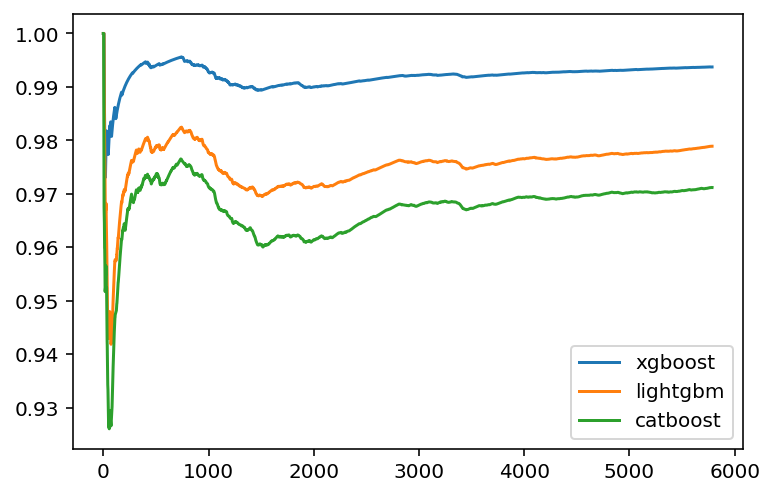

In [13]:
for classifier in moving_accuracy:
    minLen = len(moving_accuracy[classifier][0])
    for list in moving_accuracy[classifier]:
        if len(list)<minLen:
            minLen = len(list)

    for list in moving_accuracy[classifier]:
        list = list[:minLen]

    avg_list = [sum(sub_list) / len(sub_list) for sub_list in zip(*moving_accuracy[classifier])]
    plt.plot(avg_list, label = classifier)
    plt.legend()